In [1]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("wind_dataset.csv")
%matplotlib inline
plt.style.use("ggplot")

In [2]:
df.head(200)

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...,...
195,1961-07-15,10.25,0,2.6,0.0,18.8,0.0,7.6,5.8
196,1961-07-16,13.13,0,0.1,0.0,15.6,0.0,11.0,10.1
197,1961-07-17,7.08,0,0.0,0.0,19.7,0.0,10.5,8.8
198,1961-07-18,4.96,0,0.0,0.0,19.3,0.0,10.5,6.8


In [191]:
df.columns
df.axes

[Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             6564, 6565, 6566, 6567, 6568, 6569, 6570, 6571, 6572, 6573],
            dtype='int64', length=6574),
 Index(['WIND', 'IND', 'RAIN', 'IND.1', 'T.MAX', 'IND.2', 'T.MIN', 'T.MIN.G'], dtype='object')]

In [3]:
df.drop('DATE', axis=1, inplace=True)

In [4]:
df.head()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [5]:
df.isnull().sum()

WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WIND     6574 non-null   float64
 1   IND      6574 non-null   int64  
 2   RAIN     6574 non-null   float64
 3   IND.1    6513 non-null   float64
 4   T.MAX    5953 non-null   float64
 5   IND.2    6513 non-null   float64
 6   T.MIN    5900 non-null   float64
 7   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 411.0 KB


In [7]:
df.isnull().sum().sum()

1777

In [8]:
df_wind = df ["WIND"]

In [9]:
df_ınd = df["IND"]

In [10]:
df_rain = df["RAIN"]

In [11]:
df_ınd1 = df["IND.1"]

In [12]:
df_tmax = df["T.MAX"]

In [13]:
df_ınd2 = df["IND.2"]

In [14]:
df_tmın = df["T.MIN"]

In [15]:
df_tmıng = df["T.MIN.G"]

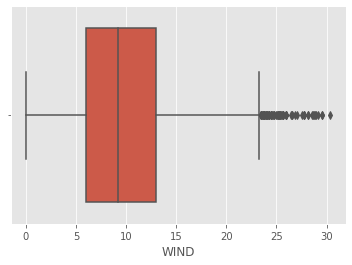

In [16]:
sns.boxplot(x =df_wind );

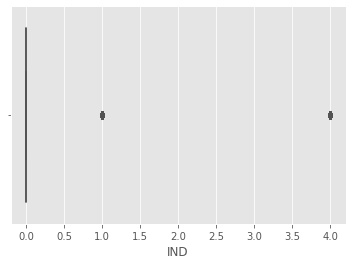

In [17]:
sns.boxplot(x = df_ınd );

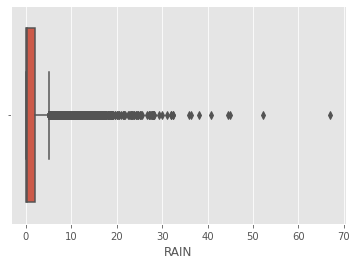

In [18]:
sns.boxplot(x =df_rain  );

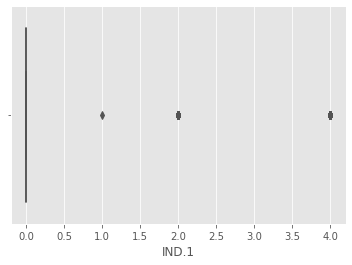

In [19]:
sns.boxplot(x =df_ınd1 );

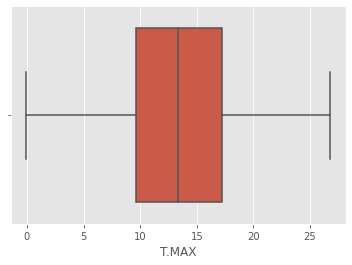

In [20]:
sns.boxplot(x =df_tmax  );

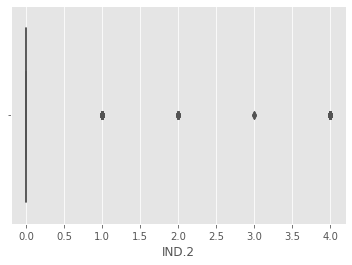

In [21]:
sns.boxplot(x =df_ınd2 );

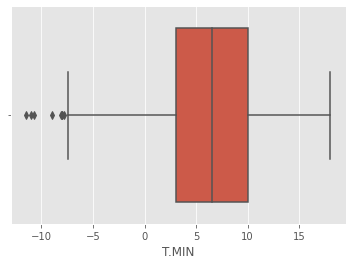

In [22]:
sns.boxplot(x =df_tmın );

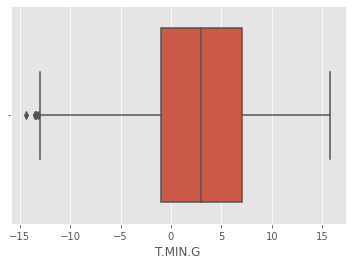

In [23]:
sns.boxplot(x =df_tmıng );

In [24]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [25]:
df_IND=df["IND.1"]

In [26]:
df_IND.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: IND.1, dtype: float64

In [27]:
df_IND.isnull().sum()

61

In [28]:
df_IND.fillna(value=df_IND.mean(),inplace=True)

In [29]:
df_IND.isnull().sum()

0

In [30]:
df["T.MIN"].fillna(value=df["T.MIN"].mean(),inplace=True)

In [31]:
df.isnull().sum()

WIND         0
IND          0
RAIN         0
IND.1        0
T.MAX      621
IND.2       61
T.MIN        0
T.MIN.G    360
dtype: int64

In [32]:
df["IND.1"].fillna(value=df["IND.1"].mean(),inplace=True)

In [33]:
df["T.MAX"].fillna(value=df["T.MAX"].mean(),inplace=True)

In [34]:
df["IND.2"].fillna(value=df["IND.2"].mean(),inplace=True)

In [35]:
df["T.MIN.G"].fillna(value=df["T.MIN.G"].mean(),inplace=True)

In [36]:
clf.fit_predict(df)

array([ 1,  1,  1, ...,  1, -1, -1])

In [37]:
df_scores = clf.negative_outlier_factor_

In [38]:
df_scores[0:10]

array([-0.98046727, -1.10157642, -1.04291241, -1.0144564 , -1.10818104,
       -0.97824605, -1.0459536 , -0.98694663, -1.06665446, -1.02152115])

In [39]:
np.sort(df_scores)[0:20]

array([-3.10614366, -2.76084796, -2.45943408, -2.45420157, -2.34055037,
       -2.30968213, -2.11851572, -2.0986499 , -2.06276078, -2.05077798,
       -1.95407832, -1.89727476, -1.87611293, -1.87436707, -1.87097997,
       -1.86273737, -1.86151738, -1.8465166 , -1.84347197, -1.83774477])

In [40]:
esik_deger = np.sort(df_scores)[13]

In [41]:
aykiri_tf = df_scores > esik_deger

In [42]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [43]:
yeni_df  = df[df_scores > esik_deger]

In [44]:
yeni_df

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...
6569,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5


In [45]:
df[df_scores < esik_deger]

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
365,10.41,0,0.0,0.0,1.200000,1.0,-10.700000,2.736547
743,10.46,0,0.0,4.0,13.339123,4.0,6.411678,-14.400000
1780,27.58,0,52.2,4.0,13.339123,4.0,6.411678,0.000000
3193,5.75,0,0.0,0.0,14.000000,1.0,-3.000000,2.736547
3213,1.04,0,0.1,0.0,16.500000,4.0,6.411678,2.736547
3652,4.63,0,0.0,0.0,3.000000,4.0,6.411678,-9.000000
3654,2.50,0,0.0,0.0,1.800000,4.0,6.411678,-4.000000
3655,7.12,0,0.5,0.0,5.800000,4.0,6.411678,-11.000000
3679,8.38,0,0.1,0.0,4.700000,4.0,6.411678,-0.500000
3681,7.04,0,0.1,0.0,3.200000,4.0,6.411678,-12.300000


In [46]:
df[df_scores == esik_deger]

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
3676,11.71,0,0.5,0.0,10.2,4.0,6.411678,4.1


<AxesSubplot:>

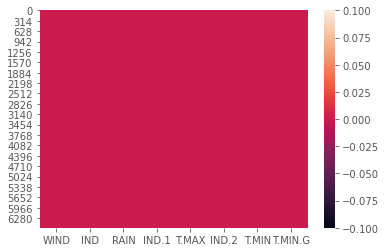

In [47]:
sns.heatmap(df.isnull())

In [48]:
df.dropna( inplace=True)
df.isnull().sum().sum()

0

In [49]:
df.isnull().sum()

WIND       0
IND        0
RAIN       0
IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
dtype: int64

In [50]:
df.head()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [51]:
df[df.isnull().all(axis=1)]

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G


In [52]:
df.isnull().sum()

WIND       0
IND        0
RAIN       0
IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
dtype: int64

In [53]:
df_rain.mean()

1.8851688469729355

In [54]:
df.isnull().sum()

WIND       0
IND        0
RAIN       0
IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
dtype: int64

In [55]:
df.head()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [56]:
!pip install missingno

In [57]:
import missingno as msno

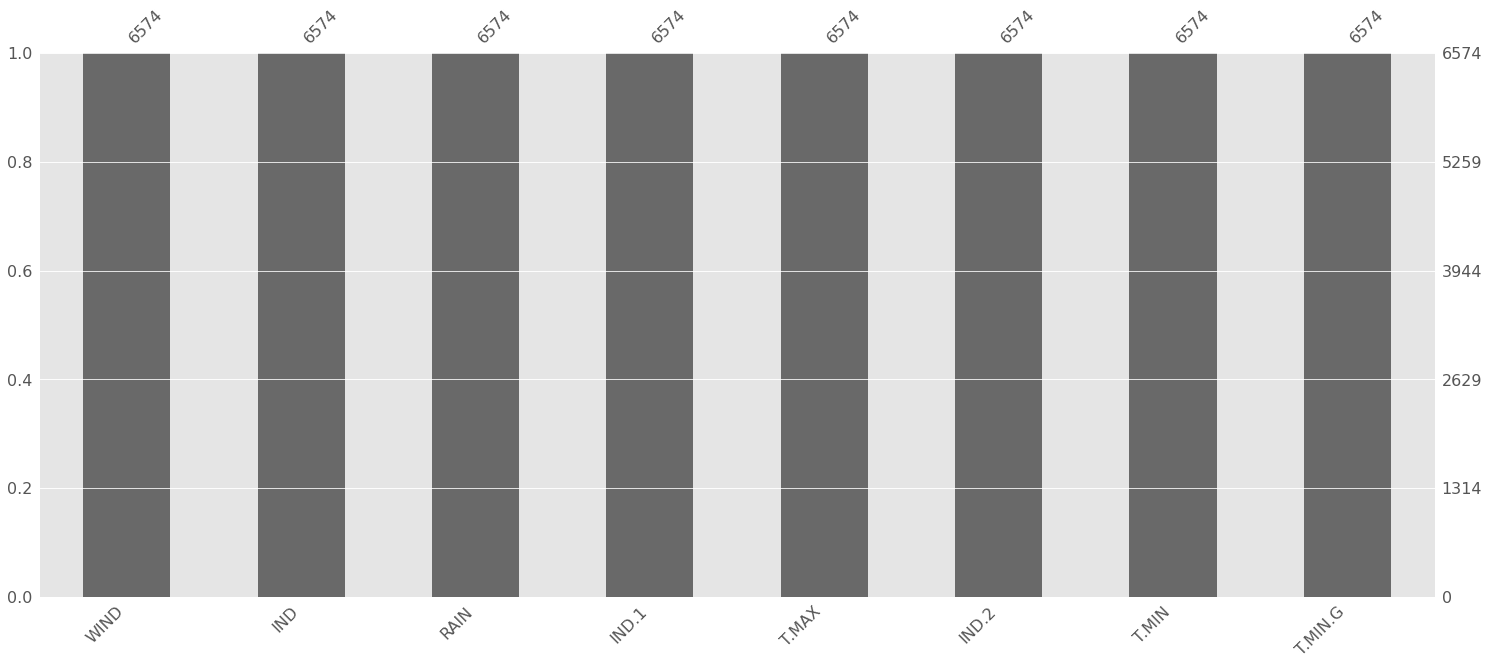

In [58]:
msno.bar(df);

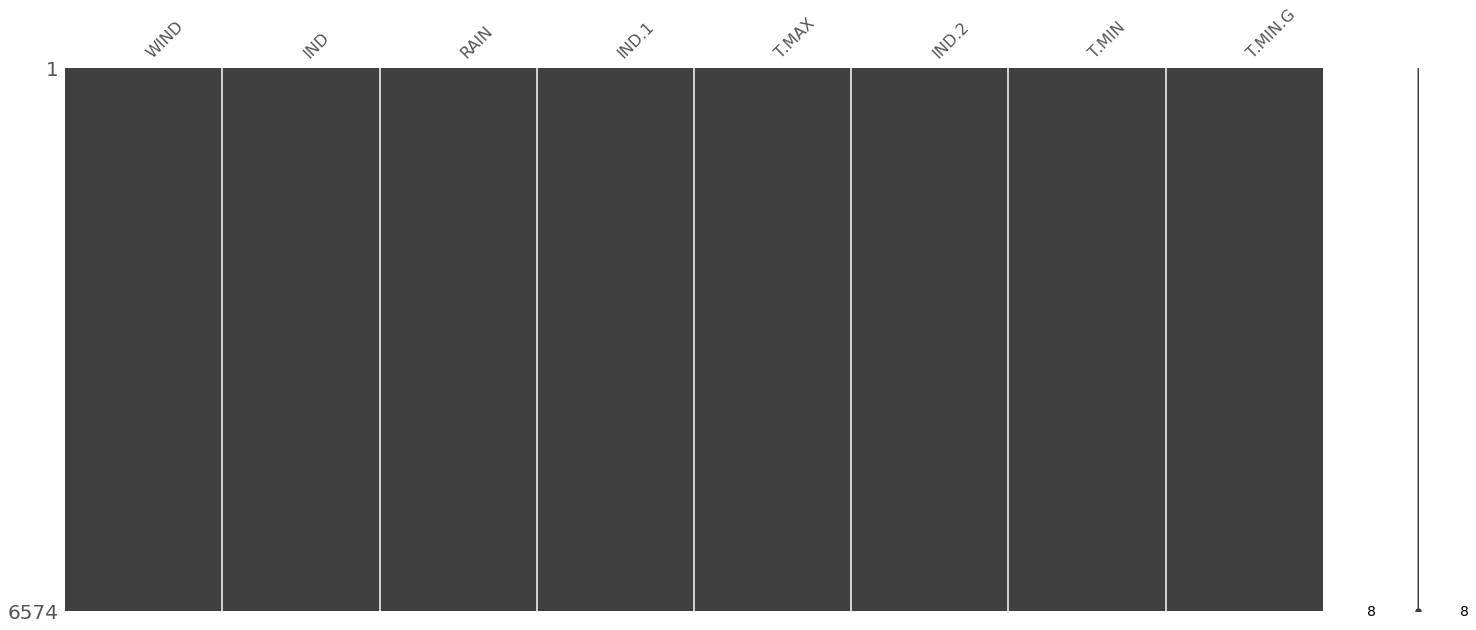

In [59]:
msno.matrix(df);

In [60]:
df.shape

(6574, 8)

In [61]:
df.isnull().sum()

WIND       0
IND        0
RAIN       0
IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
dtype: int64

In [62]:
df.head()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [63]:
X=df.values

In [64]:
X

array([[13.67,  0.  ,  0.2 , ...,  0.  ,  3.7 , -1.  ],
       [11.5 ,  0.  ,  5.1 , ...,  0.  ,  4.2 ,  1.1 ],
       [11.25,  0.  ,  0.4 , ...,  0.  ,  0.5 , -0.5 ],
       ...,
       [19.17,  0.  , 14.7 , ...,  0.  ,  3.5 ,  3.2 ],
       [18.08,  0.  ,  4.9 , ...,  0.  ,  0.3 , -0.5 ],
       [19.25,  0.  ,  0.5 , ...,  1.  , -1.5 , -3.  ]])

In [65]:
X.dtype

dtype('float64')

In [66]:
X.shape

(6574, 8)

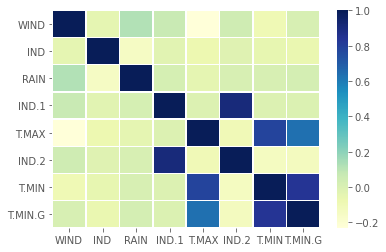

In [77]:
sns.heatmap(data = df.corr(), linewidths = .5, annot = False, cmap = "YlGnBu")
plt.show()

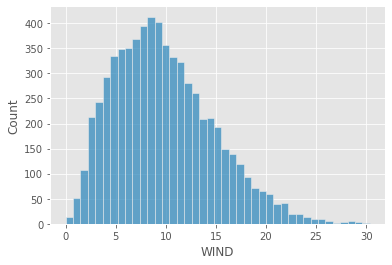

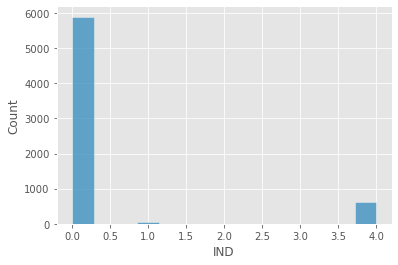

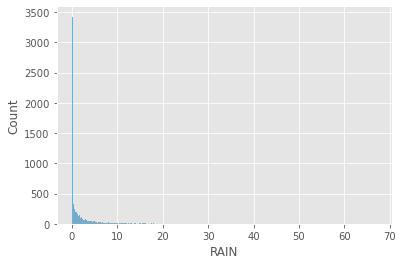

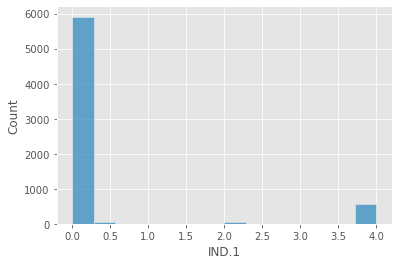

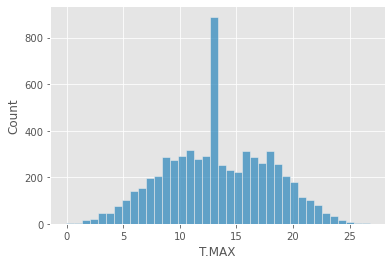

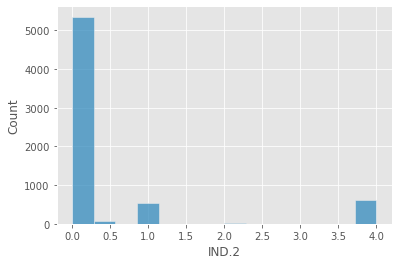

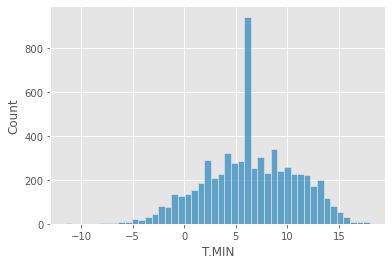

In [81]:
for title in df.columns.values.tolist()[:-1]:
    sns.histplot(data = df, x = title)
    plt.show()

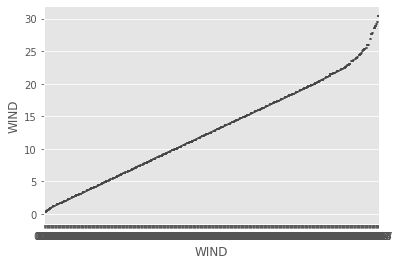

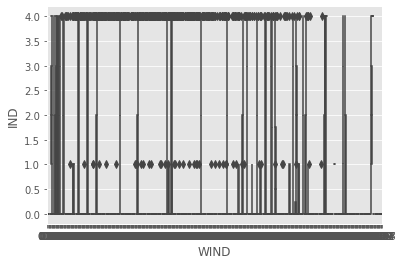

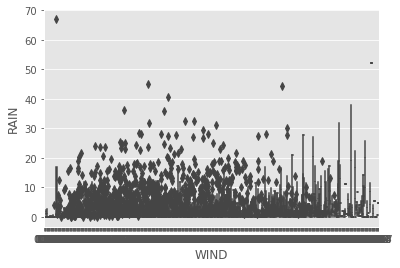

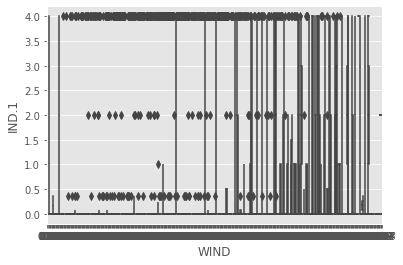

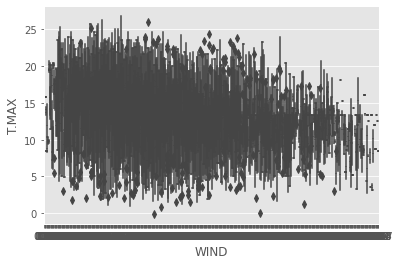

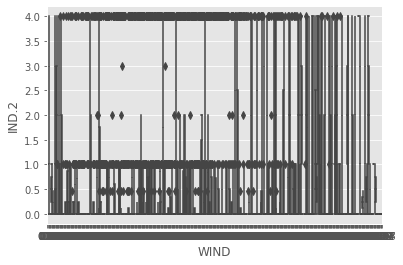

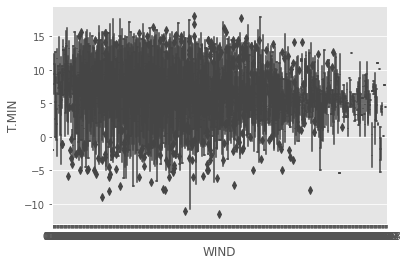

In [83]:
for title in df.columns.values.tolist()[:-1]:
    sns.boxplot(data = df, x = 'WIND', y = title)
    plt.show()

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [68]:
X_scaled

array([[ 0.77822949, -0.33209633, -0.418133  , ..., -0.3962915 ,
        -0.61731081, -0.69015036],
       [ 0.34221456, -0.33209633,  0.7976809 , ..., -0.3962915 ,
        -0.5034863 , -0.30227462],
       [ 0.29198242, -0.33209633, -0.36850794, ..., -0.3962915 ,
        -1.34578765, -0.59779899],
       ...,
       [ 1.88333647, -0.33209633,  3.17968363, ..., -0.3962915 ,
        -0.66284061,  0.08560113],
       [ 1.66432436, -0.33209633,  0.74805584, ..., -0.3962915 ,
        -1.39131745, -0.59779899],
       [ 1.89941076, -0.33209633, -0.34369541, ...,  0.45694703,
        -1.80108567, -1.05955583]])

In [69]:
from sklearn.decomposition import PCA
pca_30=PCA(n_components=8,random_state=2020)
pca_30.fit(X_scaled)
X_pca_30=pca_30.transform(X_scaled)

In [70]:
print("Variance explained by all 30 principal components=",
     sum(pca_30.explained_variance_ratio_*100))

Variance explained by all 30 principal components= 99.99999999999999


In [71]:
pca_30.explained_variance_ratio_*100

array([32.31025014, 23.51987806, 15.24331839, 12.10263949, 10.33796221,
        4.00602711,  1.48138673,  0.99853787])

In [72]:
np.cumsum(pca_30.explained_variance_ratio_*100)

array([ 32.31025014,  55.83012819,  71.07344659,  83.17608608,
        93.5140483 ,  97.5200754 ,  99.00146213, 100.        ])

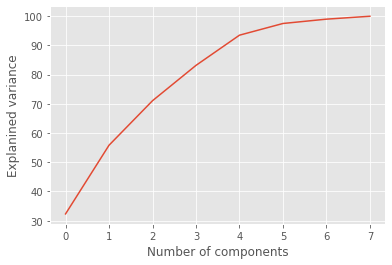

In [73]:
plt.plot(np.cumsum(pca_30.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explanined variance')
plt.savefig('elbow_plot.png',dpi=100)

In [74]:
pca_2=PCA(n_components=2,random_state=2020)
pca_2.fit(X_scaled)
X_pca_2=pca_2.transform(X_scaled)

In [ ]:
#makine öğrenmeleri

In [88]:
x= df.drop(["WIND"] ,axis = 1).astype("float64")

In [89]:
y = df["WIND"]

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [94]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [95]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 1041 to 860
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   IND      4930 non-null   float64
 1   RAIN     4930 non-null   float64
 2   IND.1    4930 non-null   float64
 3   T.MAX    4930 non-null   float64
 4   IND.2    4930 non-null   float64
 5   T.MIN    4930 non-null   float64
 6   T.MIN.G  4930 non-null   float64
dtypes: float64(7)
memory usage: 308.1 KB


In [97]:
X_reduced_train[0:1,:]
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([36.78, 63.59, 79.95, 92.12, 97.2 ])

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lm = LinearRegression()

In [101]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [102]:
pcr_model.intercept_

9.74577687626775

In [103]:
pcr_model.coef_

array([ 0.35034231,  0.12669447,  0.55039339,  0.32603857, -2.37794328,
       -0.11705239,  1.07267974])

In [104]:
y_pred = pcr_model.predict(X_reduced_train)

In [105]:
y_pred[0:5]

array([9.30750291, 9.55345976, 8.70438759, 8.26433931, 8.44665165])

In [107]:
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
np.sqrt(mean_squared_error(y_train, y_pred))

4.670090824836623

In [109]:
r2_score(y_train, y_pred)

0.11690842688882963

In [110]:
pca2 = PCA()

In [111]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [112]:
X_reduced_test.shape

(1644, 7)

In [113]:
y_pred = pcr_model.predict(X_reduced_test)

In [114]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.7713425313398945

In [117]:
#knn

In [118]:
from sklearn.neighbors import KNeighborsRegressor

In [119]:
from sklearn.metrics import mean_squared_error, r2_score

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [121]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [122]:
y_pred = knn_model.predict(X_test)

In [123]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.951911944893172

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
knn_params = {'n_neighbors': np.arange(5,30,2)}

In [126]:
knn = KNeighborsRegressor()

In [127]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 5)

In [128]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])})

In [129]:
knn_cv_model.best_params_["n_neighbors"]

29

In [135]:
knn_tuned = KNeighborsRegressor(n_neighbors = 29)

In [136]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=29)

In [137]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

4.586406863789378

In [140]:
#svr

In [141]:
from sklearn.svm import SVR

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [143]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

/Users/ceyda/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass kernel=rbf as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [144]:
y_pred = svr_rbf.predict(X_test)

In [145]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.651003569604543

In [146]:
svr_rbf

SVR()

In [147]:
svr_params = {"C": [0.01, 0.1,0.4,20,30,40,50,60,70]}

In [148]:
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)

In [149]:
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 20, 30, 40, 50, 60, 70]})

In [150]:
pd.Series(svr_cv_model.best_params_)[0]

20

In [151]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)

/Users/ceyda/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass kernel=rbf as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [152]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

4.603870150745022

In [ ]:
#yapay sinir ağı

In [153]:
from sklearn.preprocessing import StandardScaler

In [154]:
scaler = StandardScaler()

In [155]:
scaler.fit(X_train)

StandardScaler()

In [156]:
X_train_scaled = scaler.transform(X_train)

In [157]:
X_test_scaled = scaler.transform(X_test)

In [158]:
from sklearn.neural_network import MLPRegressor

In [159]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,10)).fit(X_train_scaled, y_train)

In [160]:
y_pred = mlp_model.predict(X_test_scaled)

In [183]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.518876016841518

In [184]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [185]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [186]:
mlp_cv_model.fit(X_train_scaled, y_train)

/Users/ceyda/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ceyda/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ceyda/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ceyda/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ceyda/opt/anacond

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 10)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [187]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (20, 20)}

In [176]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [177]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [178]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [179]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.518876016841518

In [220]:
#cart

In [221]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [223]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [224]:
y_pred =cart_model.predict(X_test)

NameError: name 'cart_model' is not defined

In [225]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.753283276475965

In [226]:
cart_model = DecisionTreeRegressor()

In [227]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [228]:
y_pred = cart_model.predict(X_test)

In [229]:
np.sqrt(mean_squared_error(y_test, y_pred))

6.49155637469465

In [230]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [231]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [232]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [233]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 14}

In [234]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [235]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [204]:
y_pred = cart_tuned.predict(X_test)

NameError: name 'cart_tuned' is not defined

In [205]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.518876016841518

In [206]:
#random forest

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [208]:
from sklearn.ensemble import RandomForestRegressor

In [209]:
rf_model = RandomForestRegressor(random_state = 42)

In [210]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [211]:
rf_model.predict(X_test)[0:5]

array([ 7.5139, 12.3359, 10.8867,  8.302 ,  9.1025])

In [212]:
y_pred = rf_model.predict(X_test)

In [213]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.753283276475965

In [214]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [215]:
rf_model = RandomForestRegressor(random_state = 42)

In [216]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [217]:
rf_cv_model.fit(X_train, y_train)

/Users/ceyda/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.08524852 0.08303984 0.08176154 0.08407634 0.08461126 0.09670671
 0.09747848 0.09716519 0.09728081 0.09680781        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.12926179 0.12793282 0.12761549 0.12872972
 0.12893646 0.13343889 0.13409853 0.13450108 0.13400563 0.13370663
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.15564566 0.15573139
 0.15555365 0.15588036 0.15565377 0.163218   0.16409495 0.16432203
 0.1642463  0.16411008        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.17173908 0.17263409 0.17275454 0.17293234 0.17294881 0.17865487
 0.17935906 0.17924753 0.17926026 0.17912543        nan        nan
        nan        nan        nan        

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [218]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 1000}

In [219]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3,


SyntaxError: unexpected EOF while parsing (<ipython-input-219-403b826a534d>, line 2)

In [236]:
rf_tuned.fit(X_train, y_train)

NameError: name 'rf_tuned' is not defined

In [ ]:
y_pred = rf_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))